In [1]:
#Time Series Modeling

In [2]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [3]:
#import

df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/AMZN_data.csv')

In [4]:
df.shape

(1259, 7)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [6]:
#Run an Autoregression (AR) model on the series and add the results to a column in the dataframe.

model = AR(df['close']).fit()
df['AR'] = model.predict()

In [7]:
model.k_ar

23

In [8]:
#Plot a multi-line chart comparing the AR model's results with the observed values.

def ilinechart(df, x, y, groups=None, title=''):
  fig = px.line(df, x=x, y=y, color=groups, title=title, 
                template='none').update(layout=dict(title=dict(x=0.5)))

  fig.show()

In [9]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'date', 'value', groups='variable', title='Close vs. AR Model')

In [11]:
#Run a Moving Average (MA) model on the series and add the results to a column in the dataframe.

model = ARMA(df['close'], order=(0,1)).fit()
df['MA'] = model.predict()

In [12]:
#Print the model summary and add the model's results to the line chart with observations and the AR model results.

print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -8047.769
Method:                       css-mle   S.D. of innovations            144.300
Date:                Tue, 22 Dec 2020   AIC                          16101.538
Time:                        01:08:14   BIC                          16116.952
Sample:                             0   HQIC                         16107.331
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         576.9791      8.063     71.560      0.000     561.176     592.782
ma.L1.close     0.9834      0.004    226.363      0.000       0.975       0.992
                                    Roots       

In [13]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR', 'MA'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'date', 'value', groups='variable', title='Close vs. Modeled')

In [14]:
#Run an Autoregressive Moving Average (ARMA) model on the series and add the results to a column in the dataframe

#hint

import statsmodels.api as sm

adf_test = sm.tsa.stattools.adfuller(df['close'])
results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic',
                            'P-Value', 
                            '# Lags Used',
                            '# Observations Used'])
for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

print(results)


ADF Test Statistic        2.483785
P-Value                   0.999044
# Lags Used               3.000000
# Observations Used    1255.000000
Critical Value 1%        -3.435571
Critical Value 5%        -2.863846
Critical Value 10%       -2.567998
dtype: float64


In [15]:
import statsmodels.api as sm

adf_test = sm.tsa.stattools.adfuller(df['close'])
results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic',
                            'P-Value', 
                            '# Lags Used',
                            '# Observations Used'])
for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

print(results)

ADF Test Statistic        2.483785
P-Value                   0.999044
# Lags Used               3.000000
# Observations Used    1255.000000
Critical Value 1%        -3.435571
Critical Value 5%        -2.863846
Critical Value 10%       -2.567998
dtype: float64


In [17]:
df['shift'] = df['close'].shift(1).fillna(method='bfill')
df['diff'] = df['close'] - df['shift']

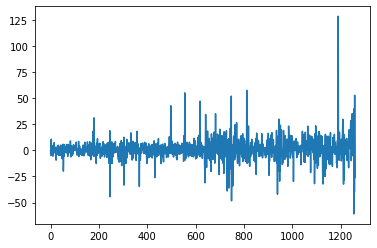

In [18]:
df['diff'].plot()

In [19]:
adf_test = sm.tsa.stattools.adfuller(df['diff'])
results = pd.Series(adf_test[0:4], 
                    index=['ADF Test Statistic',
                            'P-Value', 
                            '# Lags Used',
                            '# Observations Used'])
for key, value in adf_test[4].items():
  results[f'Critical Value {key}'] = value

print(results)

ADF Test Statistic      -21.376625
P-Value                   0.000000
# Lags Used               2.000000
# Observations Used    1256.000000
Critical Value 1%        -3.435567
Critical Value 5%        -2.863844
Critical Value 10%       -2.567997
dtype: float64


In [22]:
model = ARMA(df['diff'], order=(2,1)).fit()
df['ARMA'] = model.predict() + df['close']

In [23]:
#Print the model summary and generate a multi-line chart that compares the ARMA model's results with those from the AR and MA models.

print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                 1259
Model:                     ARMA(2, 1)   Log Likelihood               -4736.784
Method:                       css-mle   S.D. of innovations             10.417
Date:                Tue, 22 Dec 2020   AIC                           9483.569
Time:                        01:13:32   BIC                           9509.259
Sample:                             0   HQIC                          9493.223
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9186      0.300      3.064      0.002       0.331       1.506
ar.L1.diff    -0.4442      0.310     -1.432      0.153      -1.052       0.164
ar.L2.diff     0.0380      0.030      1.262      0.2

In [24]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR', 'MA', 'ARMA'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'date', 'value', groups='variable', title='Close vs. Modeled')

In [25]:
#Run an Autoregressive Integrated Moving Average (ARIMA) model on the series and add the results to a column in the dataframe.

model = ARIMA(df['close'], order=(1,2,1)).fit()
df['ARIMA'] = model.predict(typ='levels')

In [26]:
#Print the model summary and generate a multi-line chart that compares the ARIMA model's results to the observed values.¶

print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                 1257
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -4732.014
Method:                       css-mle   S.D. of innovations             10.410
Date:                Tue, 22 Dec 2020   AIC                           9472.029
Time:                        01:14:27   BIC                           9492.575
Sample:                             2   HQIC                          9479.750
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0020      0.001      2.497      0.013       0.000       0.004
ar.L1.D2.close    -0.0129      0.028     -0.455      0.649      -0.068       0.043
ma.L1.D2.close    -1.0000      0.003

In [27]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'AR', 'MA', 'ARMA', 'ARIMA'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'date', 'value', groups='variable', title='Close vs. Modeled')

In [28]:
#Run an Seasonal Autoregressive Integrated Moving Average (SARIMA) model on the series and add the results to a column in the dataframe.

model = SARIMAX(df['close'], order=(1, 1, 1), seasonal_order=(1,1,1,1)).fit()
df['SARIMA'] = model.predict()

In [29]:
#Print the model summary and generate a multi-line chart that compares the SARMA model's results with the observed values.¶

print(model.summary())

                                 Statespace Model Results                                
Dep. Variable:                             close   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 1)   Log Likelihood               -4755.986
Date:                           Tue, 22 Dec 2020   AIC                           9521.972
Time:                                   01:15:20   BIC                           9547.654
Sample:                                        0   HQIC                          9531.624
                                          - 1259                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3860      0.013     29.896      0.000       0.361       0.411
ma.L1         -0.8560      0.008   -104.273

In [30]:
melted = pd.melt(df, id_vars='date', value_vars=['close', 'SARIMA'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'date', 'value', groups='variable', title='Close vs. Modeled')

In [31]:
#Run an Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model on the series and add the results to a column in the dataframe.
#Use the daily Open prices as the exogenous factors.


model = SARIMAX(df['close'], exog=df['open'], order=(1, 1, 1), seasonal_order=(0,0,0,0)).fit()
df['SARIMAX'] = model.predict()

In [32]:
#Print the model summary and generate a multi-line chart that compares the SARMAX model's results with the SARIMA model's values.¶

print(model.summary())

                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4452.470
Date:                Tue, 22 Dec 2020   AIC                           8912.941
Time:                        01:16:39   BIC                           8933.490
Sample:                             0   HQIC                          8920.663
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
open           0.9996      0.001   1608.206      0.000       0.998       1.001
ar.L1          0.0074      0.015      0.501      0.616      -0.021       0.036
ma.L1         -1.0000      0.290     -3.454      0.0

In [33]:

melted = pd.melt(df, id_vars='date', value_vars=['close', 'SARIMA', 'SARIMAX'], 
                 var_name='variable', value_name='value')

ilinechart(melted, 'date', 'value', groups='variable', title='Close vs. Modeled')

In [34]:
#Evaluate the performance of all the models and compare to each other, using Mean Absolute Error and Root Mean Squared Error as your evaluation metrics.¶

models = ['AR', 'MA', 'ARMA', 'ARIMA', 'SARIMA', 'SARIMAX']

for model in models:
    diff = df['close'] - df[model]
    mae = diff.abs().mean()
    rmse = np.sqrt(np.mean(diff**2))
    print(f'Model {model} - MAE: {mae} | RMSE: {rmse}')

Model AR - MAE: 6.636754781948539 | RMSE: 10.39904085160622
Model MA - MAE: 124.57766603584766 | RMSE: 144.6307251244663
Model ARMA - MAE: 0.9447514391488724 | RMSE: 1.0341573155123491
Model ARIMA - MAE: 6.584097765512322 | RMSE: 10.42300979926232
Model SARIMA - MAE: 7.029688424441406 | RMSE: 13.49079714538406
Model SARIMAX - MAE: 5.553634628732583 | RMSE: 8.317116767934609


In [ ]:
#Arima is best 